In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
  
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
import datetime
now = datetime.datetime.now()


%matplotlib inline

# Import datasets


In [402]:
boston15 = pd.read_csv("marathon_results_2015.csv", index_col=0)
boston16 = pd.read_csv("marathon_results_2016.csv", index_col=0)
boston17 = pd.read_csv("marathon_results_2017.csv", index_col=0)

#add variable for the year
boston15['Year'] = 2015
boston16['Year'] = 2016
boston17['Year'] = 2017

#change variable names 
boston15.rename(columns={'M/F':'Sex'}, inplace=True)
boston16.rename(columns={'M/F':'Sex'}, inplace=True)
boston17.rename(columns={'M/F':'Sex'}, inplace=True)

# Preprocessing of the names

In [ ]:
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


boston15['Name']=boston15['Name'].map(lambda s:preprocess(s)) 
boston16['Name']=boston16['Name'].map(lambda s:preprocess(s))
boston17['Name']=boston17['Name'].map(lambda s:preprocess(s))


# Check for repeat runners

In [512]:
merged = pd.concat([boston15,boston16,boston17], sort=False)
merged["Birth"] = merged["Year"]-merged["Age"]

#Create unique identifier
merged.fillna(0, inplace=True)

merged["Id"] = merged["Birth"].astype(str) + "_" + merged["Name"].astype(str) + "_" + merged["Sex"].astype(str) + "_" + merged["Citizen"].astype(str)  
merged['Counts'] = merged.groupby(['Id'])['Year'].transform('count')
merged = merged[merged.Counts < 4]
#merged.to_csv(r"C:\Users\Ylja\OneDrive\Afstuderen\Marcel\output.csv")  # doctest: +SKIP


# Compare finish times

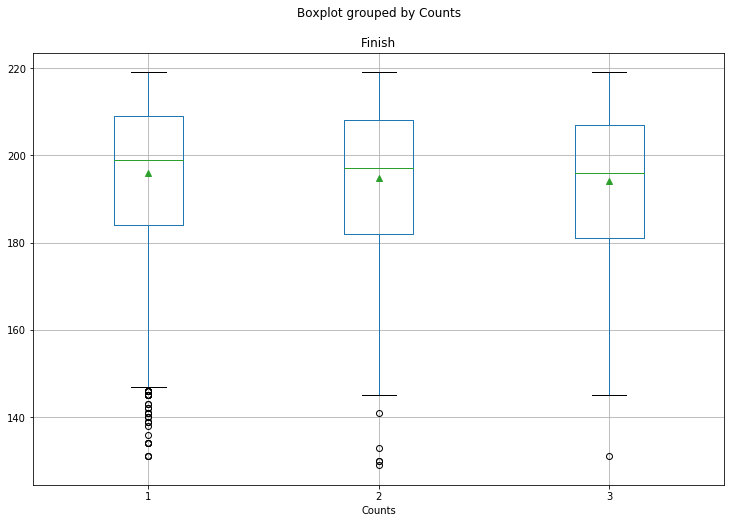

In [510]:
#merged['Finish'] = pd.to_datetime(merged['Official Time'], format='%H:%M:%S').dt.minute
output = pd.read_csv("output.csv", index_col=0, low_memory=False)

#print(merged["Finish"][1])
output.boxplot('Finish', by='Counts', figsize=(12, 8), showmeans=True)

